In [18]:
%matplotlib notebook
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [19]:
def toInt(a):
    return [int(x) for x in a]

In [20]:
def hist(a):
    k = round(1 + math.log(a.size, 2))
    delta =  int(((a[-1] - a[0]) + k - (a[-1] - a[0]) % k)/k)
    segments = []
    for i in [a[0] + j * delta for  j in range(k)]:
        segments.append(i)
    segments.append(a[0] + k * delta)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('test2png.png', dpi=100)
    
    hist, bins= np.histogram(a, bins = segments)
    center = (bins[:-1] + bins[1:]) / 2
    width = bins[0] - bins[1]
    hist = [x / delta/a.size for x in hist]
    plt.bar(center, hist, align='center', width=width, color = 'lightblue' ,edgecolor = 'black')
    plt.xlim(segments[0] - 1, segments[-1] + 1)
    plt.grid(True)
    plt.xticks(segments)
    
    plt.show()

In [21]:
def bootStrap(a):
    alpha = []
    for i in range(1000):
        al = 0
        for j in range(a.size):
            al += a[rnd.randint(0, a.size - 1)]
        alpha.append(al / a.size)
    hist(np.sort(np.array(alpha)))

In [22]:
def median(a):
    x = 0;
    for i in a:
        x += i
    return x / a.size

In [23]:
def reach(a):
    b = a[-1] - a[0]
    return b

In [24]:
def mode(a):
    d = {}
    for i in a:
        if(d.get(i) == None):
            d[i] = 1
        else:
            d[i] = d[i] + 1
    max = d[a[0]]
    for i in d.values():
        if(max < i):
            max = i
    answ = []
    for i in d.items():
        if(i[1] == max):
            answ.append(i[0])
    return answ

In [25]:
def eDistribution(a):
    newData = []
    for i in a:
        k = 0;
        for j in range(a.size):
            k += 1 if a[j] < i else 0
        newData.append(k/a.size)
    
    width = []
    for i in range(len(a) - 1):
        width.append(a[i + 1] - a[i])
    width.append(0.8)
    
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.savefig('test2png.png', dpi=100)
    plt.bar(a, newData, align='edge', width = width, color = 'pink')
    plt.xlim(a[0] - 0.1, a[-1] + 0.3 )
    plt.grid(True)
    plt.show()
    
    return "Эмпирическая фнунция распределения - F(y) = (1/" + str(a.size) + ") * sum(i = 1, " + str(a.size) + ")(I(X[i] < y))"

In [26]:
def kernelEstimation(a):
    mid = 0;
    for i in a:
        mid += i
    mid /= a.size
    G = 0
    for i in a:
        G += (i - mid)*(i - mid)
    G *= 1 / (a.size - 1)
    G = math.sqrt(G)
    h = 1.06 * G / math.pow(a.size , 0.2)
    x = []
    y = []
    rr = np.linspace(a[0] - (a[-1] - a[0]) * 0.1, a[-1] + (a[-1] - a[0]) * 0.1, a.size * 200)
    for i in rr:
        x.append(i)
        tmp = 0
        for j in a:
            z = (i - j)/h
            if (abs(z) <= 1):
                tmp += (3/4)*(1 - z*z)
            else:
                tmp += 0
        tmp *= (1/(a.size * h))
        y.append(tmp)

    plt.plot(x, y)
    plt.show()

[0.36196999 3.16427594 0.03615402 2.07819139 2.25866364 0.07346109
 0.68630536 0.90225145 0.14289894 0.2312787  0.12115772 0.57371515
 1.78880852 2.00967183 0.27916908 0.41301394 0.10904911 1.02823497
 0.09392712 0.33863584 0.04065695 3.34895987 0.147778   1.65758336
 1.52446387]


<IPython.core.display.Javascript object>


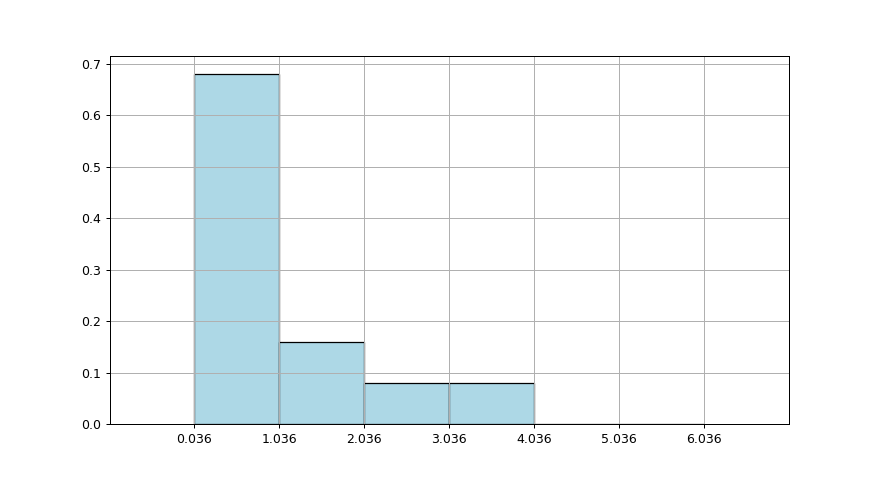

In [27]:
exp = np.array([])
for i in range (25):
    exp = np.append(exp, rnd.expovariate(1))
#exp = np.array([21, 28, 2, 10, 25, 19, 6, 13, 8, 12])
print(exp)
hist(np.sort(exp))

In [11]:
print("-------------------------------------------------------------------")
print("Моды : ")
print(mode(exp))
print("-------------------------------------------------------------------")
print("Медиана - ", median(exp))
print("Размах - ", reach(np.sort(exp)))
print("Кэффициент ассиметрии - ", 5)

-------------------------------------------------------------------
Моды : 
[0.15806711342664562, 1.2093817007506285, 0.24505514858263153, 0.2791292432499851, 0.09199547081606642, 1.4581786681925835, 2.9230337167801514, 0.3267055667476436, 1.2460811664902434, 1.2722465365973474, 1.9971125272151546, 0.2226591361655694, 1.6901094215959052, 0.30456240286506014, 1.8273458085194674, 1.4189531270391782, 1.202196773256074, 0.7088351943230674, 0.7288204327807216, 0.05478405437870748, 0.5190343247607684, 0.3144862140251867, 0.34455807525390664, 0.4292471929117064, 0.3452579692747795]
-------------------------------------------------------------------
Медиана -  0.8527134794399671
Размах -  2.868249662401444
Кэффициент ассиметрии -  5


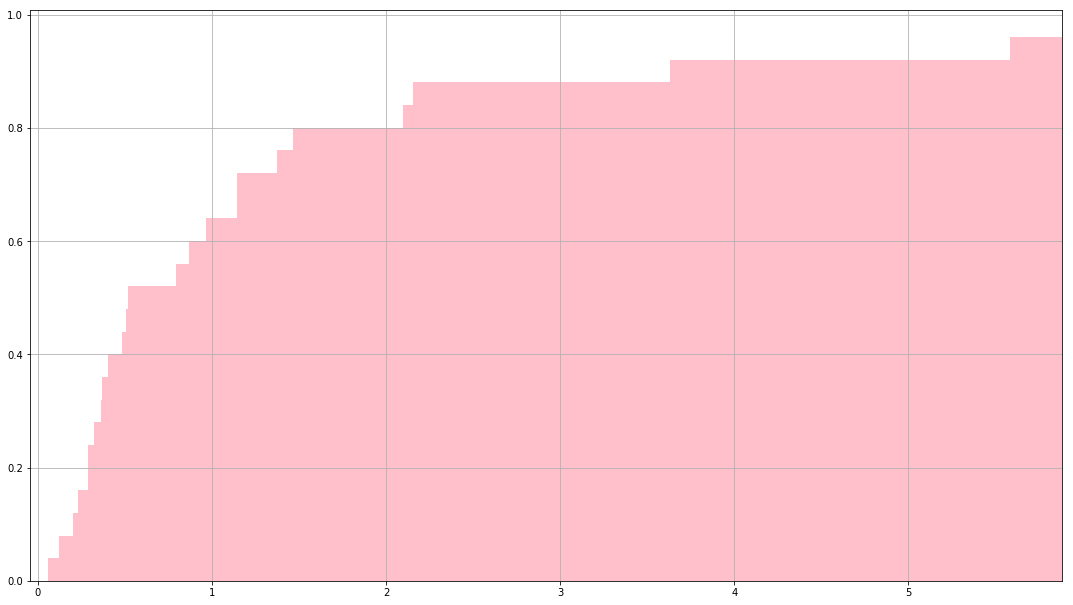

Эмпирическая фнунция распределения - F(y) = (1/25) * sum(i = 1, 25)(I(X[i] < y))


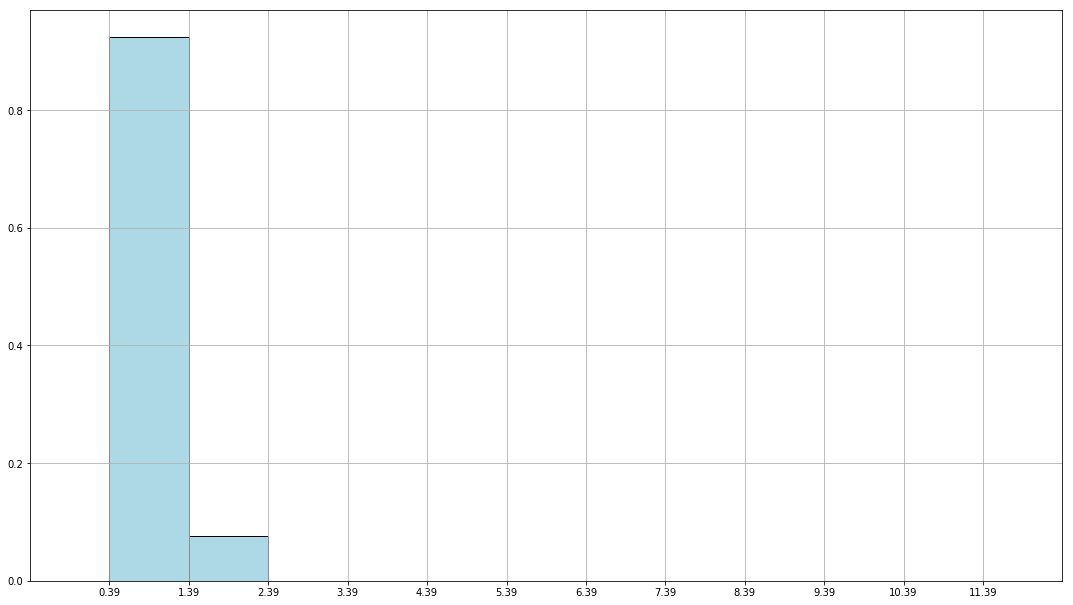

In [17]:
print(eDistribution(np.sort(exp)))
bootStrap(np.sort(exp))

<IPython.core.display.Javascript object>


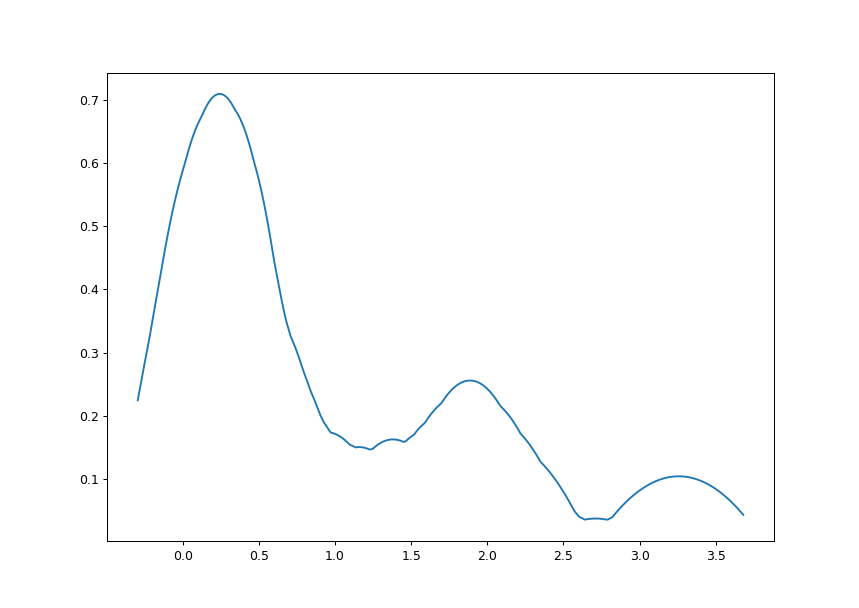

In [28]:
kernelEstimation(np.sort(exp))